# **Implement a simple deep neural network (DNN) for solving the polynomial y = 5x3−68x2−7x + 1 with the following specifications:**
### **a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.**

# **Import necessary Modules**

In [40]:
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf


## **Define the input layer And Build The Model**

In [41]:
inputs = Input(shape=(1,))

x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Define the output layer
outputs = Dense(1, activation='linear')(x)

model = Model(inputs, outputs,name='DNN')

model.summary()


Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **b) Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1**

In [42]:
import numpy as np
x=np.arange(-20,20,0.01)
print(x)
print(len(x))
y=5*x**3-68*x**2-7*x+1

[-20.   -19.99 -19.98 ...  19.97  19.98  19.99]
4000


# **Normalized data**

In [43]:
xmin=x.min()
xmax=x.max()
x=((x-xmin)/(xmax-xmin))*2-1



(array([400., 400., 400., 400., 400., 400., 400., 400., 400., 400.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

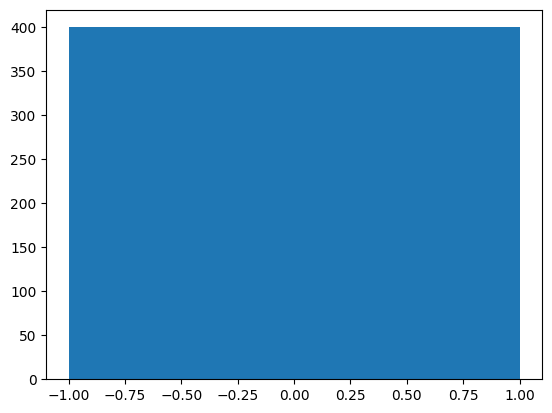

In [44]:
plt.hist(x)

(array([  96.,  104.,  115.,  130.,  150.,  182.,  240.,  397., 2280.,
         306.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

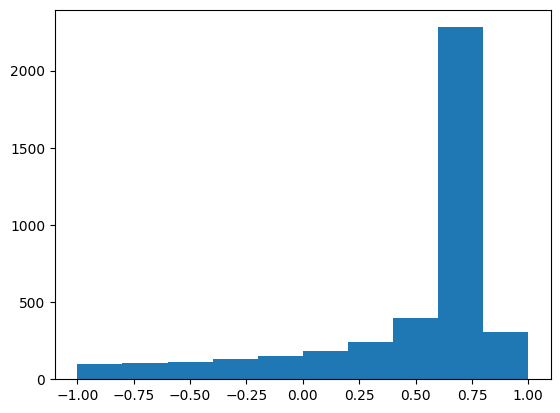

In [45]:
ymin=y.min()
ymax=y.max()
y=((y-ymin)/(ymax-ymin))*2-1
plt.hist(y)


# **Train Test Split.Divide 90% data for trainning, 5% data for testing and 5% for validation**

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.1)
print(len(x_train))
print(len(x_train))


3600
3600


In [47]:
print(f'X train Size: {len(x_train)}')
print('Range of X train {} to {}'.format(x_train.max(), x_train.min()))
print(f'X test_val Size: {len(x_test_val)}')
print(f'y train Size: {len(y_train)}')
print(f'y test_val Size: {len(y_test_val)}')


X train Size: 3600
Range of X train 0.9994998749687423 to -1.0
X test_val Size: 400
y train Size: 3600
y test_val Size: 400


# **Plot The Value of X_train and y_train after Normalization**

Text(0.5, 1.0, 'Histigram of x_train After Normalization')

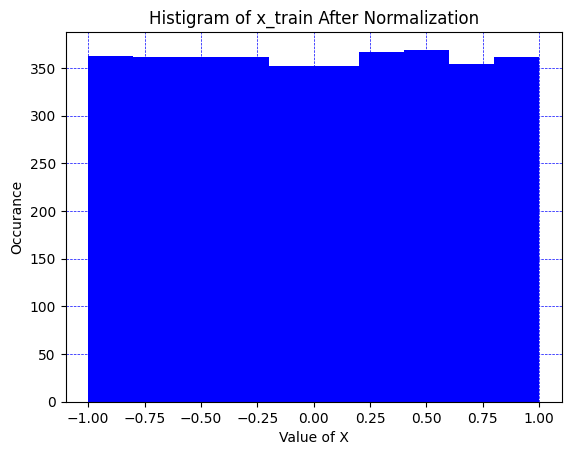

In [48]:
plt.hist(x_train, color='blue')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of X')
plt.ylabel('Occurance')
plt.title('Histigram of x_train After Normalization')


Text(0.5, 1.0, 'Histigram of y_train After Normalization')

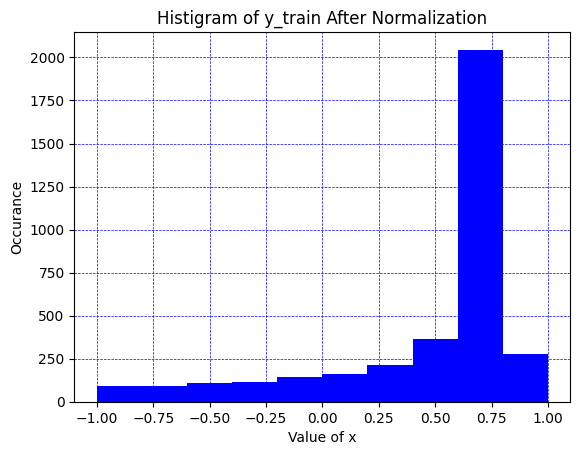

In [49]:
plt.hist(y_train, color='blue')
plt.grid(color='blue', linestyle='--', linewidth=0.5)
plt.xlabel('Value of x')
plt.ylabel('Occurance')
plt.title('Histigram of y_train After Normalization')


# **c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.**

In [50]:
x_test, x_val, y_test, y_val = train_test_split(x_test_val, y_test_val, test_size=0.5)
print('Length of X test ' ,len(x_test))
print('Length of X Val ' ,len(x_val))
print('Length of y test ' ,len(y_test))
print('Length of y val ',len(y_val))

Length of X test  200
Length of X Val  200
Length of y test  200
Length of y val  200


# **DNN with rest of the data means loss**

In [51]:
model.compile(loss='mse', metrics=[tf.keras.metrics.R2Score()])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
113/113 [==============================] - 1s 4ms/step - loss: 0.0382 - r2_score: 0.7932 - val_loss: 0.0081 - val_r2_score: 0.9603
Epoch 2/10
113/113 [==============================] - 0s 2ms/step - loss: 0.0033 - r2_score: 0.9821 - val_loss: 0.0106 - val_r2_score: 0.9479
Epoch 3/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0023 - r2_score: 0.9877 - val_loss: 0.0031 - val_r2_score: 0.9847
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0019 - r2_score: 0.9896 - val_loss: 3.6093e-04 - val_r2_score: 0.9982
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0014 - r2_score: 0.9922 - val_loss: 0.0085 - val_r2_score: 0.9583
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0016 - r2_score: 0.9916 - val_loss: 9.3902e-04 - val_r2_score: 0.9954
Epoch 7/10
113/113 [==============================] - 0s 3ms/step - loss: 0.0012 - r2_score: 0.9934 - val_loss: 0.0038 - val_r2_score: 0.981

# **d) Display the training accuracy vs validation accuracy and training error vs validation error curves.**

In [55]:
#Denormalize the data
x_test = ((x_test + 1) * (xmax - xmin) / 2) + xmin
y_test = ((y_test + 1) * (ymax - ymin) / 2) + ymin

In [56]:
#Y predict
y_pred = model.predict(x_test)
y_pred = ((y_pred + 1) * (ymax - ymin) / 2) + ymin

7/7 [==============================] - 0s 2ms/step


In [59]:
training_predict=history.history
print(training_predict)

{'loss': [0.03824025020003319, 0.0033134608529508114, 0.0022663231939077377, 0.0019223993876948953, 0.0014411620795726776, 0.0015561276813969016, 0.0012237685732543468, 0.0012430297210812569, 0.0011334277223795652, 0.00103154091630131], 'r2_score': [0.7932078838348389, 0.9820817708969116, 0.9877443909645081, 0.9896042346954346, 0.9922066330909729, 0.9915848970413208, 0.9933822154998779, 0.9932780861854553, 0.993870735168457, 0.9944217205047607], 'val_loss': [0.008113887161016464, 0.01064772717654705, 0.0031272917985916138, 0.0003609336563386023, 0.00852694921195507, 0.0009390187915414572, 0.00383279868401587, 0.00201936112716794, 0.0010521344374865294, 0.0004536702763289213], 'val_r2_score': [0.9603071212768555, 0.9479116201400757, 0.98470139503479, 0.9982343316078186, 0.9582864046096802, 0.9954063296318054, 0.9812500476837158, 0.9901213645935059, 0.9948529601097107, 0.9977806806564331]}


In [60]:
print(training_predict.keys())

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])


Text(0.5, 1.0, 'Train Accuracy Vs Validation Accuracy')

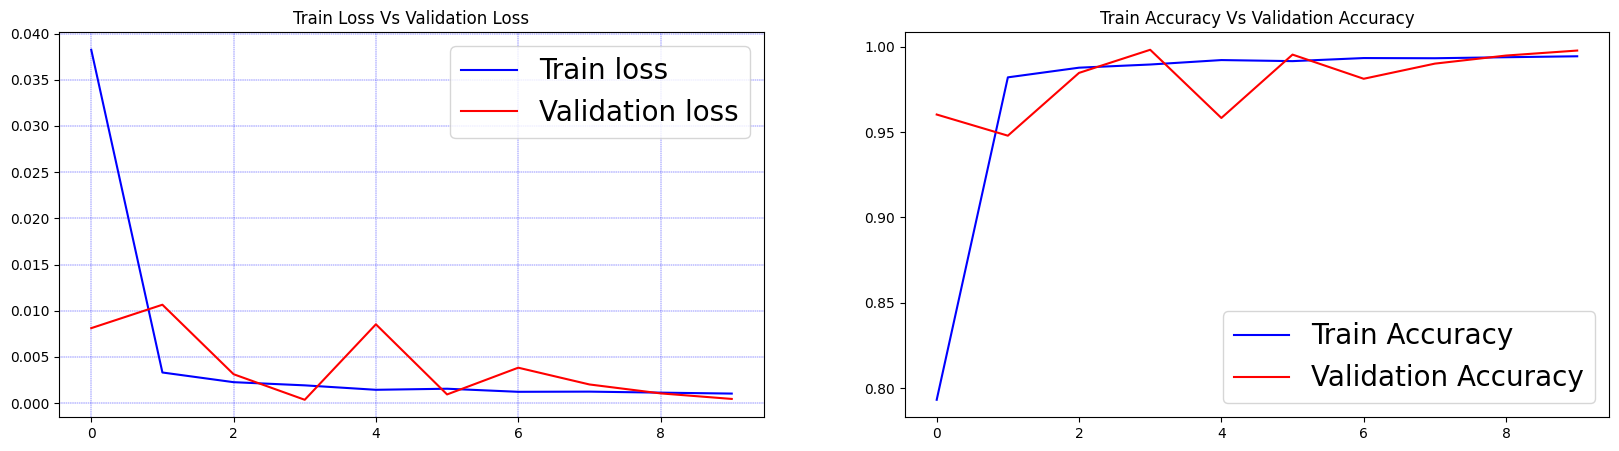

In [67]:
training_predict=history.history
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(training_predict['loss'], color='blue', label='Train loss')
plt.plot(training_predict['val_loss'], color='red', label = 'Validation loss')
plt.legend(loc='upper right', fontsize=20)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Loss Vs Validation Loss')

plt.subplot(1,2,2)
plt.plot(training_predict['r2_score'], color='blue', label='Train Accuracy')
plt.plot(training_predict['val_r2_score'], color='red', label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.grid(color='blue', linewidth=0.3, linestyle='--')
plt.title('Train Accuracy Vs Validation Accuracy')



# **e) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.**

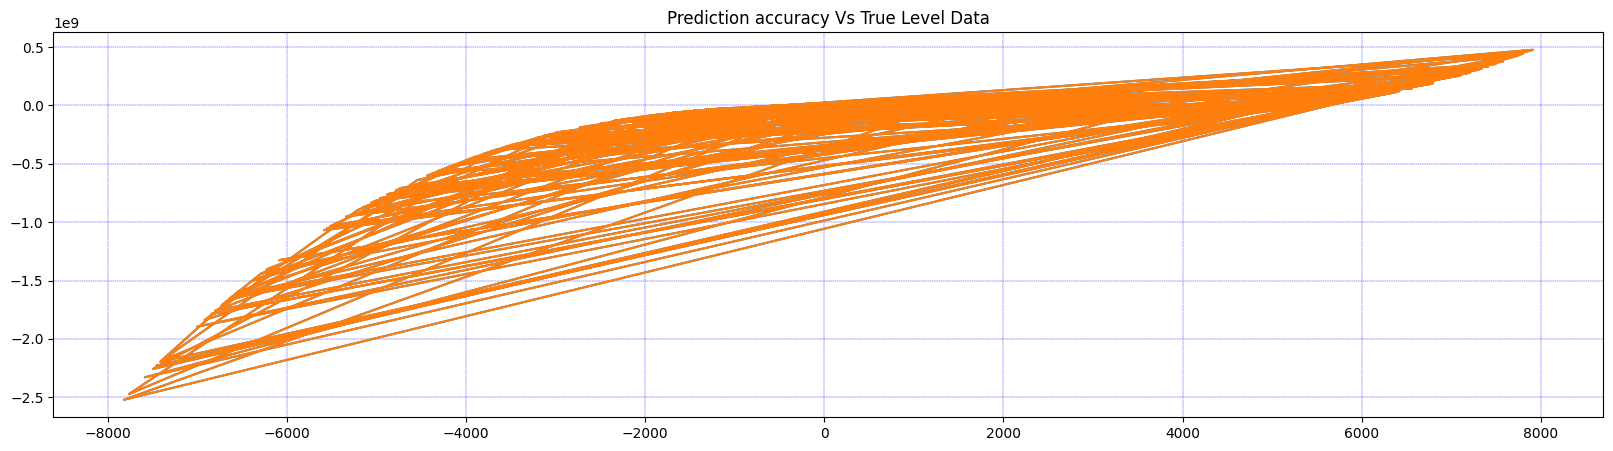

In [71]:
training_predict=history.history
plt.figure(figsize = (20, 5))
plt.plot(x_test,y_test,label='True level Data')
plt.plot(x_test,y_test,label='Prediction Data')
plt.title('Prediction accuracy Vs True Level Data')
plt.grid(color='blue', linewidth=0.3, linestyle='--')


